# Financial inclusion project 

Importing dependencies
Reading data
Data analysis
Data preprocessing
Data

In [1]:
# Importing dependencies
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from catboost import CatBoostClassifier
import optuna

C:\Users\Gbanjubola\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Data Reading

In [2]:
data = pd.read_csv('Train_v2.csv')

test = pd.read_csv('Test_v2.csv')
data

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed


# Data Information

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [4]:
data.drop('uniqueid', axis = 1, inplace = True)

# Summary statistics

In [5]:
data.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


# Data analytics

In [6]:
data.columns

Index(['country', 'year', 'bank_account', 'location_type', 'cellphone_access',
       'household_size', 'age_of_respondent', 'gender_of_respondent',
       'relationship_with_head', 'marital_status', 'education_level',
       'job_type'],
      dtype='object')

<Axes: xlabel='bank_account', ylabel='count'>

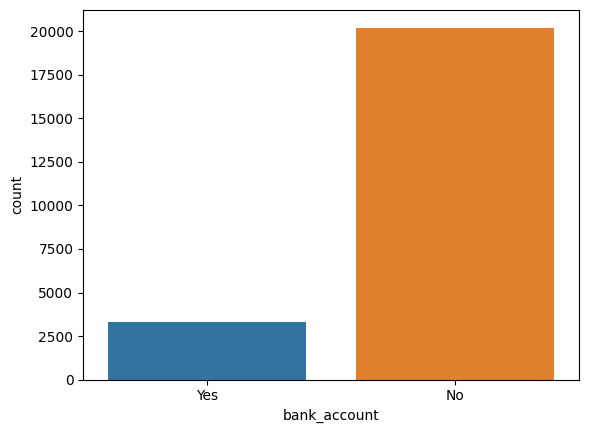

In [7]:
sn.countplot(data, x = 'bank_account')

<Axes: xlabel='location_type', ylabel='count'>

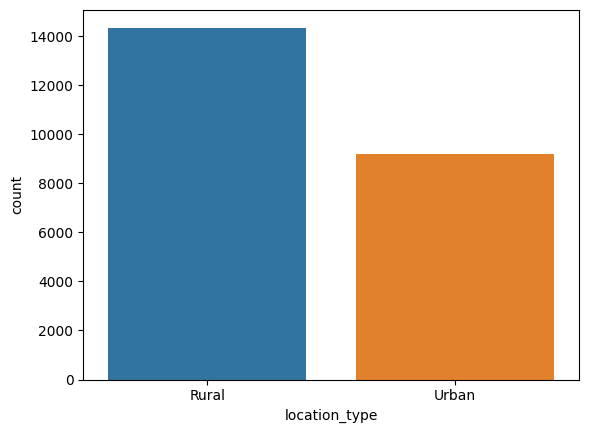

In [8]:
sn.countplot(data, x = 'location_type')

<Axes: xlabel='household_size'>

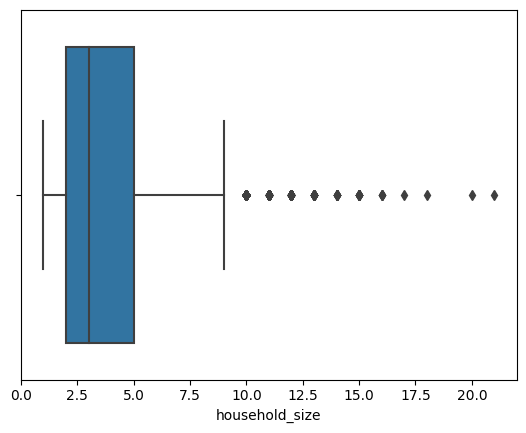

In [9]:
sn.boxplot(data, x = 'household_size')

<Axes: xlabel='education_level', ylabel='count'>

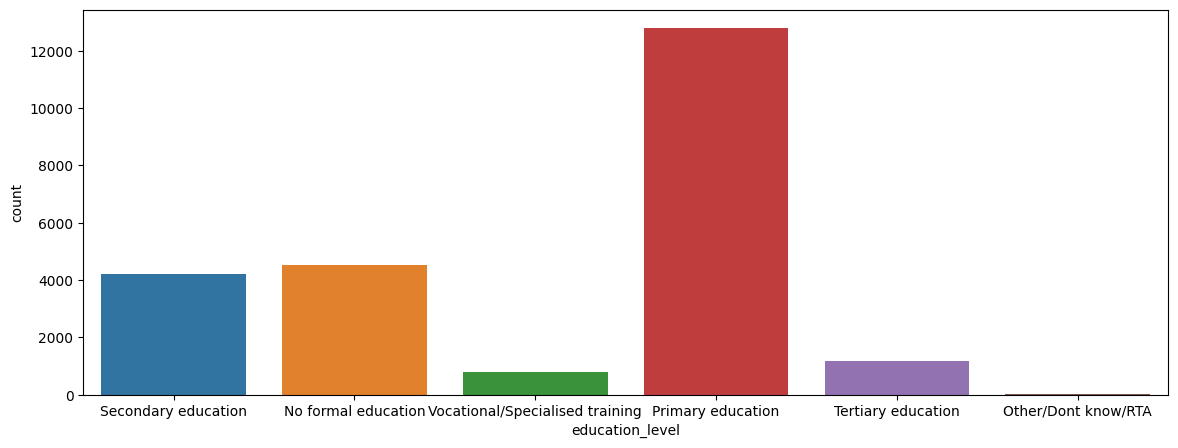

In [10]:
plt.figure(figsize=(14, 5))
sn.countplot(data, x = 'education_level')

# Feature engineering

remove / from marital status
separate married from divorced, from widowed, from single
create a new column of married and not married

In [11]:
data['marital_status'].value_counts()

marital_status
Married/Living together    10749
Single/Never Married        7983
Widowed                     2708
Divorced/Seperated          2076
Dont know                      8
Name: count, dtype: int64

In [12]:
data['marital_status'] = data['marital_status'].apply(lambda x: x.split('/')[0])
data

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,Yes,Rural,Yes,3,24,Female,Spouse,Married,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5,26,Male,Other relative,Single,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5,34,Female,Head of Household,Married,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8,26,Male,Child,Single,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,No,Rural,Yes,4,48,Female,Head of Household,Divorced,No formal education,Other Income
23520,Uganda,2018,No,Rural,Yes,2,27,Female,Head of Household,Single,Secondary education,Other Income
23521,Uganda,2018,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,No,Urban,Yes,7,30,Female,Parent,Divorced,Secondary education,Self employed


In [13]:
data['marital_status'].value_counts()

marital_status
Married      10749
Single        7983
Widowed       2708
Divorced      2076
Dont know        8
Name: count, dtype: int64

In [14]:
data['marital_status'] = data['marital_status'].apply(lambda x: data['marital_status'].mode()[0] if x == 'Dont know' else x)

In [15]:
data['married'] = data['marital_status'].apply(lambda x:'Widowed' if x == 'Widowed'  else 'Married' if x == 'Married' else 'Not Married')
data

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,married
0,Kenya,2018,Yes,Rural,Yes,3,24,Female,Spouse,Married,Secondary education,Self employed,Married
1,Kenya,2018,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent,Widowed
2,Kenya,2018,Yes,Urban,Yes,5,26,Male,Other relative,Single,Vocational/Specialised training,Self employed,Not Married
3,Kenya,2018,No,Rural,Yes,5,34,Female,Head of Household,Married,Primary education,Formally employed Private,Married
4,Kenya,2018,No,Urban,No,8,26,Male,Child,Single,Primary education,Informally employed,Not Married
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,No,Rural,Yes,4,48,Female,Head of Household,Divorced,No formal education,Other Income,Not Married
23520,Uganda,2018,No,Rural,Yes,2,27,Female,Head of Household,Single,Secondary education,Other Income,Not Married
23521,Uganda,2018,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income,Widowed
23522,Uganda,2018,No,Urban,Yes,7,30,Female,Parent,Divorced,Secondary education,Self employed,Not Married


In [16]:
data['education_level']

0                    Secondary education
1                    No formal education
2        Vocational/Specialised training
3                      Primary education
4                      Primary education
                      ...               
23519                No formal education
23520                Secondary education
23521                  Primary education
23522                Secondary education
23523                Secondary education
Name: education_level, Length: 23524, dtype: object

In [17]:
data['education_level'].value_counts()

education_level
Primary education                  12791
No formal education                 4515
Secondary education                 4223
Tertiary education                  1157
Vocational/Specialised training      803
Other/Dont know/RTA                   35
Name: count, dtype: int64

In [18]:
data['Literacy'] = data['education_level'].apply(lambda x: 'literate' if 'education' == x.split(' ')[-1] else 'illiterate')

In [19]:
data['education_level'].value_counts()

education_level
Primary education                  12791
No formal education                 4515
Secondary education                 4223
Tertiary education                  1157
Vocational/Specialised training      803
Other/Dont know/RTA                   35
Name: count, dtype: int64

In [20]:
data

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,married,Literacy
0,Kenya,2018,Yes,Rural,Yes,3,24,Female,Spouse,Married,Secondary education,Self employed,Married,literate
1,Kenya,2018,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent,Widowed,literate
2,Kenya,2018,Yes,Urban,Yes,5,26,Male,Other relative,Single,Vocational/Specialised training,Self employed,Not Married,illiterate
3,Kenya,2018,No,Rural,Yes,5,34,Female,Head of Household,Married,Primary education,Formally employed Private,Married,literate
4,Kenya,2018,No,Urban,No,8,26,Male,Child,Single,Primary education,Informally employed,Not Married,literate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,No,Rural,Yes,4,48,Female,Head of Household,Divorced,No formal education,Other Income,Not Married,literate
23520,Uganda,2018,No,Rural,Yes,2,27,Female,Head of Household,Single,Secondary education,Other Income,Not Married,literate
23521,Uganda,2018,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income,Widowed,literate
23522,Uganda,2018,No,Urban,Yes,7,30,Female,Parent,Divorced,Secondary education,Self employed,Not Married,literate


In [21]:
data.job_type.value_counts()

job_type
Self employed                   6437
Informally employed             5597
Farming and Fishing             5441
Remittance Dependent            2527
Other Income                    1080
Formally employed Private       1055
No Income                        627
Formally employed Government     387
Government Dependent             247
Dont Know/Refuse to answer       126
Name: count, dtype: int64

In [22]:
data

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,married,Literacy
0,Kenya,2018,Yes,Rural,Yes,3,24,Female,Spouse,Married,Secondary education,Self employed,Married,literate
1,Kenya,2018,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent,Widowed,literate
2,Kenya,2018,Yes,Urban,Yes,5,26,Male,Other relative,Single,Vocational/Specialised training,Self employed,Not Married,illiterate
3,Kenya,2018,No,Rural,Yes,5,34,Female,Head of Household,Married,Primary education,Formally employed Private,Married,literate
4,Kenya,2018,No,Urban,No,8,26,Male,Child,Single,Primary education,Informally employed,Not Married,literate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,No,Rural,Yes,4,48,Female,Head of Household,Divorced,No formal education,Other Income,Not Married,literate
23520,Uganda,2018,No,Rural,Yes,2,27,Female,Head of Household,Single,Secondary education,Other Income,Not Married,literate
23521,Uganda,2018,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income,Widowed,literate
23522,Uganda,2018,No,Urban,Yes,7,30,Female,Parent,Divorced,Secondary education,Self employed,Not Married,literate


In [23]:
data['job_type'].value_counts()

job_type
Self employed                   6437
Informally employed             5597
Farming and Fishing             5441
Remittance Dependent            2527
Other Income                    1080
Formally employed Private       1055
No Income                        627
Formally employed Government     387
Government Dependent             247
Dont Know/Refuse to answer       126
Name: count, dtype: int64

In [24]:
data['employment_type'] = data['job_type'].apply(lambda x: 'Unemployed' if (x == 'No Income' or x == 'Remittance Dependent' or x == 'Government Dependent' or x == 'Dont Know/Refuse to answer') else 'Employed')

In [25]:
data['employment_type'].value_counts()

employment_type
Employed      19997
Unemployed     3527
Name: count, dtype: int64

In [26]:
data

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,married,Literacy,employment_type
0,Kenya,2018,Yes,Rural,Yes,3,24,Female,Spouse,Married,Secondary education,Self employed,Married,literate,Employed
1,Kenya,2018,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent,Widowed,literate,Unemployed
2,Kenya,2018,Yes,Urban,Yes,5,26,Male,Other relative,Single,Vocational/Specialised training,Self employed,Not Married,illiterate,Employed
3,Kenya,2018,No,Rural,Yes,5,34,Female,Head of Household,Married,Primary education,Formally employed Private,Married,literate,Employed
4,Kenya,2018,No,Urban,No,8,26,Male,Child,Single,Primary education,Informally employed,Not Married,literate,Employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,No,Rural,Yes,4,48,Female,Head of Household,Divorced,No formal education,Other Income,Not Married,literate,Employed
23520,Uganda,2018,No,Rural,Yes,2,27,Female,Head of Household,Single,Secondary education,Other Income,Not Married,literate,Employed
23521,Uganda,2018,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income,Widowed,literate,Employed
23522,Uganda,2018,No,Urban,Yes,7,30,Female,Parent,Divorced,Secondary education,Self employed,Not Married,literate,Employed


In [27]:
le = LabelEncoder()
ohe = OneHotEncoder()

ohe_feature = ['country', 'relationship_with_head', 'marital_status', 'education_level','job_type']
le_feature = ['bank_account', 'location_type', 'cellphone_access', 'gender_of_respondent', 'married', 'Literacy', 'employment_type']

for feature in le_feature:
    data[feature] = le.fit_transform(data[feature])

In [28]:
data.columns

Index(['country', 'year', 'bank_account', 'location_type', 'cellphone_access',
       'household_size', 'age_of_respondent', 'gender_of_respondent',
       'relationship_with_head', 'marital_status', 'education_level',
       'job_type', 'married', 'Literacy', 'employment_type'],
      dtype='object')

In [29]:
 for feature in ohe_feature:
        df = pd.get_dummies(data[feature], dtype= int)
        data = pd.concat([data, df], axis = 1)
        data.drop(feature, axis= 1, inplace= True)


In [30]:
data

,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,married,Literacy,employment_type,...,Dont Know/Refuse to answer,Farming and Fishing,Formally employed Government,Formally employed Private,Government Dependent,Informally employed,No Income,Other Income,Remittance Dependent,Self employed
0,2018,1,0,1,3,24,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,2018,0,0,0,5,70,0,2,1,1,...,0,0,0,0,1,0,0,0,0,0
2,2018,1,1,1,5,26,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2018,0,0,1,5,34,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,2018,0,1,0,8,26,1,1,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,2018,0,0,1,4,48,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
23520,2018,0,0,1,2,27,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
23521,2018,0,0,1,5,27,0,2,1,0,...,0,0,0,0,0,0,0,1,0,0
23522,2018,0,1,1,7,30,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1


In [31]:
scaler = StandardScaler()
data['age_of_respondent'] = scaler.fit_transform(data[['age_of_respondent']])
data['household_size'] = scaler.fit_transform(data[['household_size']])

In [32]:
X = data.drop(['year', 'bank_account'], axis=1)
y = data.bank_account

# Model building

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=50)

In [34]:
smote = SMOTE(random_state= 10)
X_resample, y_resample = smote.fit_resample(X_train, y_train)

In [35]:

xg = XGBClassifier(objective='binary:logistic', max_depth = 3, learning_rate = 0.1, n_estimators = 100)

xg.fit(X_train, y_train)
pred = xg.predict(X_test)

print(accuracy_score(y_test, pred))
print()
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print()

0.8839779005524862

[[1972   51]
 [ 222  108]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      2023
           1       0.68      0.33      0.44       330

    accuracy                           0.88      2353
   macro avg       0.79      0.65      0.69      2353
weighted avg       0.87      0.88      0.87      2353




In [36]:

xg = XGBClassifier(objective='binary:logistic', max_depth = 3, learning_rate = 0.1, n_estimators = 100)

xg.fit(X_resample, y_resample)
pred = xg.predict(X_test)

print(accuracy_score(y_test, pred))
print()
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print()

0.8278793030174245

[[1726  297]
 [ 108  222]]
              precision    recall  f1-score   support

           0       0.94      0.85      0.89      2023
           1       0.43      0.67      0.52       330

    accuracy                           0.83      2353
   macro avg       0.68      0.76      0.71      2353
weighted avg       0.87      0.83      0.84      2353




In [39]:
model = CatBoostClassifier()
model.fit(X_train, y_train)
result = model.predict(X_test)

Learning rate set to 0.037934
0:	learn: 0.6595319	total: 16.5ms	remaining: 16.5s
1:	learn: 0.6231244	total: 32.2ms	remaining: 16.1s
2:	learn: 0.5945933	total: 47.3ms	remaining: 15.7s
3:	learn: 0.5659018	total: 62.5ms	remaining: 15.6s
4:	learn: 0.5472737	total: 72.2ms	remaining: 14.4s
5:	learn: 0.5279847	total: 87ms	remaining: 14.4s
6:	learn: 0.5074308	total: 105ms	remaining: 14.9s
7:	learn: 0.4896591	total: 120ms	remaining: 14.8s
8:	learn: 0.4754095	total: 135ms	remaining: 14.9s
9:	learn: 0.4601060	total: 151ms	remaining: 14.9s
10:	learn: 0.4460105	total: 166ms	remaining: 14.9s
11:	learn: 0.4331383	total: 181ms	remaining: 14.9s
12:	learn: 0.4240014	total: 197ms	remaining: 14.9s
13:	learn: 0.4131779	total: 241ms	remaining: 17s
14:	learn: 0.4036365	total: 260ms	remaining: 17.1s
15:	learn: 0.3961418	total: 276ms	remaining: 16.9s
16:	learn: 0.3876955	total: 291ms	remaining: 16.8s
17:	learn: 0.3812196	total: 306ms	remaining: 16.7s
18:	learn: 0.3747221	total: 322ms	remaining: 16.6s
19:	learn

169:	learn: 0.2679157	total: 3.8s	remaining: 18.5s
170:	learn: 0.2678494	total: 3.83s	remaining: 18.6s
171:	learn: 0.2677500	total: 3.85s	remaining: 18.5s
172:	learn: 0.2676585	total: 3.87s	remaining: 18.5s
173:	learn: 0.2675880	total: 3.88s	remaining: 18.4s
174:	learn: 0.2675156	total: 3.9s	remaining: 18.4s
175:	learn: 0.2673981	total: 3.92s	remaining: 18.3s
176:	learn: 0.2673061	total: 3.93s	remaining: 18.3s
177:	learn: 0.2672456	total: 3.95s	remaining: 18.2s
178:	learn: 0.2671323	total: 3.97s	remaining: 18.2s
179:	learn: 0.2670682	total: 3.99s	remaining: 18.2s
180:	learn: 0.2669826	total: 4s	remaining: 18.1s
181:	learn: 0.2668491	total: 4.02s	remaining: 18.1s
182:	learn: 0.2667458	total: 4.05s	remaining: 18.1s
183:	learn: 0.2666468	total: 4.06s	remaining: 18s
184:	learn: 0.2665438	total: 4.08s	remaining: 18s
185:	learn: 0.2664528	total: 4.11s	remaining: 18s
186:	learn: 0.2664259	total: 4.13s	remaining: 18s
187:	learn: 0.2663440	total: 4.17s	remaining: 18s
188:	learn: 0.2662559	total

331:	learn: 0.2571749	total: 7.01s	remaining: 14.1s
332:	learn: 0.2571341	total: 7.03s	remaining: 14.1s
333:	learn: 0.2570863	total: 7.05s	remaining: 14.1s
334:	learn: 0.2570479	total: 7.07s	remaining: 14s
335:	learn: 0.2570047	total: 7.09s	remaining: 14s
336:	learn: 0.2569344	total: 7.1s	remaining: 14s
337:	learn: 0.2568984	total: 7.12s	remaining: 13.9s
338:	learn: 0.2568646	total: 7.13s	remaining: 13.9s
339:	learn: 0.2568143	total: 7.14s	remaining: 13.9s
340:	learn: 0.2567748	total: 7.17s	remaining: 13.8s
341:	learn: 0.2567452	total: 7.18s	remaining: 13.8s
342:	learn: 0.2567025	total: 7.2s	remaining: 13.8s
343:	learn: 0.2566325	total: 7.21s	remaining: 13.8s
344:	learn: 0.2565698	total: 7.25s	remaining: 13.8s
345:	learn: 0.2565346	total: 7.26s	remaining: 13.7s
346:	learn: 0.2564792	total: 7.28s	remaining: 13.7s
347:	learn: 0.2564369	total: 7.29s	remaining: 13.7s
348:	learn: 0.2563854	total: 7.31s	remaining: 13.6s
349:	learn: 0.2563286	total: 7.33s	remaining: 13.6s
350:	learn: 0.256263

494:	learn: 0.2483290	total: 10.3s	remaining: 10.5s
495:	learn: 0.2482784	total: 10.3s	remaining: 10.5s
496:	learn: 0.2482247	total: 10.4s	remaining: 10.5s
497:	learn: 0.2481687	total: 10.4s	remaining: 10.5s
498:	learn: 0.2481047	total: 10.4s	remaining: 10.4s
499:	learn: 0.2480568	total: 10.4s	remaining: 10.4s
500:	learn: 0.2479890	total: 10.4s	remaining: 10.4s
501:	learn: 0.2479159	total: 10.4s	remaining: 10.4s
502:	learn: 0.2478469	total: 10.5s	remaining: 10.3s
503:	learn: 0.2478200	total: 10.5s	remaining: 10.3s
504:	learn: 0.2477648	total: 10.5s	remaining: 10.3s
505:	learn: 0.2477177	total: 10.5s	remaining: 10.3s
506:	learn: 0.2476743	total: 10.6s	remaining: 10.3s
507:	learn: 0.2476396	total: 10.6s	remaining: 10.2s
508:	learn: 0.2476156	total: 10.6s	remaining: 10.2s
509:	learn: 0.2475839	total: 10.6s	remaining: 10.2s
510:	learn: 0.2475044	total: 10.6s	remaining: 10.2s
511:	learn: 0.2474665	total: 10.6s	remaining: 10.1s
512:	learn: 0.2473983	total: 10.7s	remaining: 10.1s
513:	learn: 

655:	learn: 0.2409009	total: 14s	remaining: 7.36s
656:	learn: 0.2408641	total: 14.1s	remaining: 7.35s
657:	learn: 0.2408131	total: 14.1s	remaining: 7.34s
658:	learn: 0.2407695	total: 14.2s	remaining: 7.34s
659:	learn: 0.2407570	total: 14.2s	remaining: 7.33s
660:	learn: 0.2407310	total: 14.3s	remaining: 7.31s
661:	learn: 0.2407120	total: 14.3s	remaining: 7.3s
662:	learn: 0.2406787	total: 14.4s	remaining: 7.3s
663:	learn: 0.2406262	total: 14.4s	remaining: 7.29s
664:	learn: 0.2405752	total: 14.4s	remaining: 7.28s
665:	learn: 0.2405226	total: 14.5s	remaining: 7.26s
666:	learn: 0.2404899	total: 14.5s	remaining: 7.25s
667:	learn: 0.2404795	total: 14.6s	remaining: 7.24s
668:	learn: 0.2404326	total: 14.6s	remaining: 7.21s
669:	learn: 0.2404061	total: 14.6s	remaining: 7.18s
670:	learn: 0.2403560	total: 14.6s	remaining: 7.16s
671:	learn: 0.2403169	total: 14.6s	remaining: 7.13s
672:	learn: 0.2402622	total: 14.6s	remaining: 7.11s
673:	learn: 0.2402418	total: 14.6s	remaining: 7.08s
674:	learn: 0.24

816:	learn: 0.2348366	total: 18.1s	remaining: 4.04s
817:	learn: 0.2348109	total: 18.1s	remaining: 4.03s
818:	learn: 0.2347612	total: 18.1s	remaining: 4s
819:	learn: 0.2347315	total: 18.1s	remaining: 3.98s
820:	learn: 0.2347011	total: 18.2s	remaining: 3.96s
821:	learn: 0.2346869	total: 18.2s	remaining: 3.93s
822:	learn: 0.2346488	total: 18.2s	remaining: 3.91s
823:	learn: 0.2346095	total: 18.2s	remaining: 3.89s
824:	learn: 0.2345688	total: 18.2s	remaining: 3.86s
825:	learn: 0.2345183	total: 18.2s	remaining: 3.84s
826:	learn: 0.2344846	total: 18.2s	remaining: 3.81s
827:	learn: 0.2344576	total: 18.3s	remaining: 3.79s
828:	learn: 0.2344219	total: 18.3s	remaining: 3.77s
829:	learn: 0.2343728	total: 18.3s	remaining: 3.75s
830:	learn: 0.2343313	total: 18.3s	remaining: 3.73s
831:	learn: 0.2342968	total: 18.3s	remaining: 3.7s
832:	learn: 0.2342724	total: 18.4s	remaining: 3.68s
833:	learn: 0.2342306	total: 18.4s	remaining: 3.66s
834:	learn: 0.2341946	total: 18.4s	remaining: 3.64s
835:	learn: 0.23

975:	learn: 0.2296386	total: 21.1s	remaining: 519ms
976:	learn: 0.2296036	total: 21.1s	remaining: 498ms
977:	learn: 0.2295587	total: 21.2s	remaining: 476ms
978:	learn: 0.2295139	total: 21.2s	remaining: 454ms
979:	learn: 0.2294609	total: 21.2s	remaining: 432ms
980:	learn: 0.2294238	total: 21.2s	remaining: 411ms
981:	learn: 0.2293477	total: 21.2s	remaining: 389ms
982:	learn: 0.2293138	total: 21.2s	remaining: 367ms
983:	learn: 0.2292836	total: 21.2s	remaining: 345ms
984:	learn: 0.2292587	total: 21.3s	remaining: 324ms
985:	learn: 0.2292291	total: 21.3s	remaining: 302ms
986:	learn: 0.2292065	total: 21.3s	remaining: 280ms
987:	learn: 0.2291491	total: 21.3s	remaining: 259ms
988:	learn: 0.2290950	total: 21.3s	remaining: 237ms
989:	learn: 0.2290573	total: 21.3s	remaining: 216ms
990:	learn: 0.2290348	total: 21.4s	remaining: 194ms
991:	learn: 0.2290154	total: 21.4s	remaining: 172ms
992:	learn: 0.2289803	total: 21.4s	remaining: 151ms
993:	learn: 0.2289712	total: 21.4s	remaining: 129ms
994:	learn: 

In [40]:
print(f'accuracy: {accuracy_score(y_test, result)}')
print()
print(confusion_matrix(y_test, result))
print()
print(classification_report(y_test, result))

accuracy: 0.885252868678283

[[1964   59]
 [ 211  119]]

              precision    recall  f1-score   support

           0       0.90      0.97      0.94      2023
           1       0.67      0.36      0.47       330

    accuracy                           0.89      2353
   macro avg       0.79      0.67      0.70      2353
weighted avg       0.87      0.89      0.87      2353



In [41]:
model = CatBoostClassifier()
model.fit(X_resample, y_resample)
result = model.predict(X_test)

Learning rate set to 0.047798
0:	learn: 0.6688416	total: 24.3ms	remaining: 24.3s
1:	learn: 0.6481147	total: 47.8ms	remaining: 23.8s
2:	learn: 0.6316898	total: 70.5ms	remaining: 23.4s
3:	learn: 0.6146276	total: 94.4ms	remaining: 23.5s
4:	learn: 0.6001438	total: 118ms	remaining: 23.5s
5:	learn: 0.5873274	total: 142ms	remaining: 23.5s
6:	learn: 0.5754145	total: 173ms	remaining: 24.5s
7:	learn: 0.5655502	total: 198ms	remaining: 24.6s
8:	learn: 0.5561162	total: 253ms	remaining: 27.9s
9:	learn: 0.5476675	total: 277ms	remaining: 27.4s
10:	learn: 0.5402259	total: 301ms	remaining: 27.1s
11:	learn: 0.5344069	total: 337ms	remaining: 27.8s
12:	learn: 0.5287468	total: 379ms	remaining: 28.8s
13:	learn: 0.5232830	total: 412ms	remaining: 29s
14:	learn: 0.5172804	total: 441ms	remaining: 29s
15:	learn: 0.5121588	total: 475ms	remaining: 29.2s
16:	learn: 0.5071750	total: 508ms	remaining: 29.4s
17:	learn: 0.5025753	total: 531ms	remaining: 29s
18:	learn: 0.4977705	total: 558ms	remaining: 28.8s
19:	learn: 0.

163:	learn: 0.3055179	total: 7.03s	remaining: 35.8s
164:	learn: 0.3051664	total: 7.05s	remaining: 35.7s
165:	learn: 0.3049698	total: 7.08s	remaining: 35.6s
166:	learn: 0.3040896	total: 7.11s	remaining: 35.5s
167:	learn: 0.3038905	total: 7.13s	remaining: 35.3s
168:	learn: 0.3036093	total: 7.16s	remaining: 35.2s
169:	learn: 0.3032743	total: 7.18s	remaining: 35.1s
170:	learn: 0.3023572	total: 7.2s	remaining: 34.9s
171:	learn: 0.3021369	total: 7.23s	remaining: 34.8s
172:	learn: 0.3019754	total: 7.26s	remaining: 34.7s
173:	learn: 0.3006805	total: 7.29s	remaining: 34.6s
174:	learn: 0.3004445	total: 7.31s	remaining: 34.5s
175:	learn: 0.2993220	total: 7.33s	remaining: 34.3s
176:	learn: 0.2982556	total: 7.36s	remaining: 34.2s
177:	learn: 0.2978163	total: 7.38s	remaining: 34.1s
178:	learn: 0.2967096	total: 7.41s	remaining: 34s
179:	learn: 0.2965143	total: 7.43s	remaining: 33.9s
180:	learn: 0.2963043	total: 7.46s	remaining: 33.7s
181:	learn: 0.2958629	total: 7.49s	remaining: 33.7s
182:	learn: 0.2

328:	learn: 0.2426846	total: 12.1s	remaining: 24.6s
329:	learn: 0.2424806	total: 12.1s	remaining: 24.6s
330:	learn: 0.2421496	total: 12.1s	remaining: 24.5s
331:	learn: 0.2419928	total: 12.1s	remaining: 24.4s
332:	learn: 0.2418025	total: 12.2s	remaining: 24.4s
333:	learn: 0.2413521	total: 12.2s	remaining: 24.3s
334:	learn: 0.2407393	total: 12.2s	remaining: 24.2s
335:	learn: 0.2402671	total: 12.2s	remaining: 24.2s
336:	learn: 0.2401732	total: 12.3s	remaining: 24.1s
337:	learn: 0.2395730	total: 12.3s	remaining: 24.1s
338:	learn: 0.2389980	total: 12.3s	remaining: 24s
339:	learn: 0.2388741	total: 12.3s	remaining: 24s
340:	learn: 0.2385644	total: 12.4s	remaining: 23.9s
341:	learn: 0.2380950	total: 12.4s	remaining: 23.8s
342:	learn: 0.2379311	total: 12.4s	remaining: 23.8s
343:	learn: 0.2375161	total: 12.4s	remaining: 23.7s
344:	learn: 0.2374351	total: 12.5s	remaining: 23.7s
345:	learn: 0.2371733	total: 12.5s	remaining: 23.6s
346:	learn: 0.2368786	total: 12.5s	remaining: 23.6s
347:	learn: 0.23

491:	learn: 0.2112935	total: 17.1s	remaining: 17.6s
492:	learn: 0.2111896	total: 17.1s	remaining: 17.6s
493:	learn: 0.2111269	total: 17.2s	remaining: 17.6s
494:	learn: 0.2109871	total: 17.2s	remaining: 17.5s
495:	learn: 0.2108436	total: 17.2s	remaining: 17.5s
496:	learn: 0.2107670	total: 17.2s	remaining: 17.4s
497:	learn: 0.2106637	total: 17.3s	remaining: 17.4s
498:	learn: 0.2105082	total: 17.3s	remaining: 17.3s
499:	learn: 0.2104234	total: 17.3s	remaining: 17.3s
500:	learn: 0.2103648	total: 17.3s	remaining: 17.3s
501:	learn: 0.2101354	total: 17.4s	remaining: 17.2s
502:	learn: 0.2100626	total: 17.4s	remaining: 17.2s
503:	learn: 0.2097143	total: 17.4s	remaining: 17.1s
504:	learn: 0.2095877	total: 17.4s	remaining: 17.1s
505:	learn: 0.2095079	total: 17.5s	remaining: 17s
506:	learn: 0.2091474	total: 17.5s	remaining: 17s
507:	learn: 0.2090820	total: 17.5s	remaining: 17s
508:	learn: 0.2089949	total: 17.5s	remaining: 16.9s
509:	learn: 0.2089063	total: 17.6s	remaining: 16.9s
510:	learn: 0.2086

650:	learn: 0.1925901	total: 21.4s	remaining: 11.5s
651:	learn: 0.1925219	total: 21.4s	remaining: 11.4s
652:	learn: 0.1924216	total: 21.4s	remaining: 11.4s
653:	learn: 0.1923718	total: 21.4s	remaining: 11.3s
654:	learn: 0.1921753	total: 21.5s	remaining: 11.3s
655:	learn: 0.1921203	total: 21.5s	remaining: 11.3s
656:	learn: 0.1918923	total: 21.5s	remaining: 11.2s
657:	learn: 0.1918247	total: 21.5s	remaining: 11.2s
658:	learn: 0.1917600	total: 21.6s	remaining: 11.2s
659:	learn: 0.1916094	total: 21.6s	remaining: 11.1s
660:	learn: 0.1915355	total: 21.6s	remaining: 11.1s
661:	learn: 0.1914903	total: 21.6s	remaining: 11.1s
662:	learn: 0.1913647	total: 21.7s	remaining: 11s
663:	learn: 0.1912680	total: 21.7s	remaining: 11s
664:	learn: 0.1912051	total: 21.7s	remaining: 10.9s
665:	learn: 0.1910845	total: 21.7s	remaining: 10.9s
666:	learn: 0.1910319	total: 21.8s	remaining: 10.9s
667:	learn: 0.1909800	total: 21.8s	remaining: 10.8s
668:	learn: 0.1909100	total: 21.8s	remaining: 10.8s
669:	learn: 0.19

810:	learn: 0.1804632	total: 25.7s	remaining: 5.99s
811:	learn: 0.1804358	total: 25.7s	remaining: 5.95s
812:	learn: 0.1803862	total: 25.7s	remaining: 5.92s
813:	learn: 0.1803299	total: 25.8s	remaining: 5.88s
814:	learn: 0.1802488	total: 25.8s	remaining: 5.85s
815:	learn: 0.1801896	total: 25.8s	remaining: 5.82s
816:	learn: 0.1801600	total: 25.8s	remaining: 5.79s
817:	learn: 0.1800957	total: 25.9s	remaining: 5.75s
818:	learn: 0.1800343	total: 25.9s	remaining: 5.72s
819:	learn: 0.1799855	total: 25.9s	remaining: 5.69s
820:	learn: 0.1799223	total: 25.9s	remaining: 5.66s
821:	learn: 0.1798802	total: 26s	remaining: 5.62s
822:	learn: 0.1797933	total: 26s	remaining: 5.59s
823:	learn: 0.1797383	total: 26s	remaining: 5.56s
824:	learn: 0.1797029	total: 26s	remaining: 5.52s
825:	learn: 0.1796618	total: 26.1s	remaining: 5.49s
826:	learn: 0.1796066	total: 26.1s	remaining: 5.46s
827:	learn: 0.1795628	total: 26.1s	remaining: 5.42s
828:	learn: 0.1795040	total: 26.1s	remaining: 5.39s
829:	learn: 0.179429

971:	learn: 0.1720128	total: 30s	remaining: 864ms
972:	learn: 0.1719300	total: 30s	remaining: 833ms
973:	learn: 0.1718718	total: 30s	remaining: 802ms
974:	learn: 0.1718146	total: 30.1s	remaining: 771ms
975:	learn: 0.1717972	total: 30.1s	remaining: 740ms
976:	learn: 0.1717216	total: 30.1s	remaining: 709ms
977:	learn: 0.1716857	total: 30.1s	remaining: 678ms
978:	learn: 0.1716388	total: 30.2s	remaining: 647ms
979:	learn: 0.1715553	total: 30.2s	remaining: 616ms
980:	learn: 0.1714778	total: 30.2s	remaining: 585ms
981:	learn: 0.1714250	total: 30.3s	remaining: 555ms
982:	learn: 0.1713839	total: 30.3s	remaining: 524ms
983:	learn: 0.1713537	total: 30.3s	remaining: 493ms
984:	learn: 0.1712797	total: 30.3s	remaining: 462ms
985:	learn: 0.1712202	total: 30.3s	remaining: 431ms
986:	learn: 0.1711842	total: 30.4s	remaining: 400ms
987:	learn: 0.1711159	total: 30.4s	remaining: 369ms
988:	learn: 0.1710763	total: 30.4s	remaining: 338ms
989:	learn: 0.1710481	total: 30.5s	remaining: 308ms
990:	learn: 0.1709

In [42]:
print(f'accuracy: {accuracy_score(y_test, result)}')
print()
print(confusion_matrix(y_test, result))
print()
print(classification_report(y_test, result))

accuracy: 0.8805779855503613

[[1925   98]
 [ 183  147]]

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      2023
           1       0.60      0.45      0.51       330

    accuracy                           0.88      2353
   macro avg       0.76      0.70      0.72      2353
weighted avg       0.87      0.88      0.87      2353



# using optuna

In [67]:
#define objectives
''' LogisticRegression(
penalty, 
C, 
solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'},
max_iter, )
'''
def objective(trial):
    # define parameters
    
    C = trial.suggest_int('C', 0.001, 1000)
    penalty = trial.suggest_categorical('penalty', ['none', 'l1', 'l2'])
    solver = trial.suggest_categorical('solver', ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'])
    
    model = LogisticRegression(C = C, penalty = penalty, solver = solver, random_state= 10)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy
    

In [68]:
study = optuna.create_study(direction= 'maximize')
study.optimize(objective, n_trials= 10)

[I 2023-09-15 13:48:34,332] A new study created in memory with name: no-name-90675829-0565-4b34-85b1-da7446791560
[I 2023-09-15 13:48:35,263] Trial 0 finished with value: 0.8818529536761581 and parameters: {'C': 87, 'penalty': 'l2', 'solver': 'sag'}. Best is trial 0 with value: 0.8818529536761581.
[I 2023-09-15 13:48:35,613] Trial 1 finished with value: 0.8818529536761581 and parameters: {'C': 831, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8818529536761581.
[I 2023-09-15 13:48:36,384] Trial 2 finished with value: 0.8818529536761581 and parameters: {'C': 374, 'penalty': 'l2', 'solver': 'sag'}. Best is trial 0 with value: 0.8818529536761581.
[W 2023-09-15 13:48:36,389] Trial 3 failed with parameters: {'C': 495, 'penalty': 'l1', 'solver': 'sag'} because of the following error: ValueError("Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.").
Traceback (most recent call last):
  File "C:\Users\Gbanjubola\AppData\Local\Programs\Python\Python311\L

ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

In [57]:
#define objectives
CatBoostClassifier()

def objective(trial):
    # define parameters
    
    C = trial.suggest_int('C', 0.001, 1000)
    penalty = trial.suggest_categorical('penalty', [None, 'l1', 'l2'])
    solver = trial.suggest_categorical('solver', ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'])
    fit_intercept = trial.suggest_categorical('fit_intercept', [True, False])
    normalize = trial.suggest_categorical('normalize', [True, False])
    
    
    model = LogisticRegression(C = C, penalty = penalty, solver = solver, fit_intercept = fit_intercept)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    return 1.0 - accuracy
    

In [58]:
study = optuna.create_study(direction= 'minimize')
study.optimize(objective, n_trials= 10)

[I 2023-09-15 11:26:03,693] A new study created in memory with name: no-name-46870331-9ace-4877-91b8-bbd875db883e
[I 2023-09-15 11:26:04,439] Trial 0 finished with value: 0.11814704632384188 and parameters: {'C': 771, 'penalty': 'l2', 'solver': 'sag', 'fit_intercept': True, 'normalize': True}. Best is trial 0 with value: 0.11814704632384188.
[I 2023-09-15 11:26:05,093] Trial 1 finished with value: 0.11814704632384188 and parameters: {'C': 768, 'penalty': 'l2', 'solver': 'sag', 'fit_intercept': False, 'normalize': False}. Best is trial 0 with value: 0.11814704632384188.
[I 2023-09-15 11:26:05,267] Trial 2 finished with value: 0.11814704632384188 and parameters: {'C': 291, 'penalty': 'l2', 'solver': 'newton-cholesky', 'fit_intercept': True, 'normalize': False}. Best is trial 0 with value: 0.11814704632384188.
C:\Users\Gbanjubola\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_rati

ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

In [70]:
#define objectives
CatBoostClassifier()

def objective(trial):
    # define parameters
    
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
        'random_strength': trial.suggest_loguniform('random_strength', 1e-5, 10),
        'bagging_temperature': trial.suggest_loguniform('bagging_temperature', 0.01, 100)
    }
    
    model = CatBoostClassifier(**params, verbose = 0, random_state = 42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy
    

In [71]:
study = optuna.create_study(direction= 'maximize')
study.optimize(objective, n_trials= 10)

[I 2023-09-15 13:53:15,663] A new study created in memory with name: no-name-f731a480-e0b2-4a5b-8c22-97b44cbe82bc
C:\Users\Gbanjubola\AppData\Local\Temp\ipykernel_7836\3465575052.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
C:\Users\Gbanjubola\AppData\Local\Temp\ipykernel_7836\3465575052.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
C:\Users\Gbanjubola\AppData\Local\Temp\ipykernel_7836\3465575052.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://

[I 2023-09-15 13:54:10,689] Trial 4 finished with value: 0.8869528261793456 and parameters: {'iterations': 726, 'depth': 6, 'learning_rate': 0.021453912868644082, 'l2_leaf_reg': 34.969267492191406, 'random_strength': 5.245008313702657, 'bagging_temperature': 4.727577094236511}. Best is trial 4 with value: 0.8869528261793456.
C:\Users\Gbanjubola\AppData\Local\Temp\ipykernel_7836\3465575052.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
C:\Users\Gbanjubola\AppData\Local\Temp\ipykernel_7836\3465575052.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2

[I 2023-09-15 13:55:20,046] Trial 9 finished with value: 0.8810029749256268 and parameters: {'iterations': 819, 'depth': 9, 'learning_rate': 0.07525404779532241, 'l2_leaf_reg': 9.913458084031376, 'random_strength': 0.0002599384393383004, 'bagging_temperature': 0.02700061802091768}. Best is trial 4 with value: 0.8869528261793456.
